# End-to-End Machine Learning Project - Stock Market Analysis

*Analisis dan Prediksi Market Cap Saham di Bursa Efek Indonesia*

Proyek ini menggunakan data saham dari Bursa Efek Indonesia untuk memprediksi Market Capitalization berdasarkan berbagai fitur perusahaan.

# Setup

Menyiapkan lingkungan kerja Python agar analisis dan visualisasi data dapat berjalan lancar. Langkah pertama adalah mengimpor pustaka standar seperti numpy untuk operasi numerik, pandas untuk manipulasi data, sklearn untuk keperluan machine learning, dan matplotlib untuk visualisasi. Selain itu, dilakukan konfigurasi tambahan, yaitu mengatur path direktori untuk menyimpan hasil visualisasi dan mendefinisikan fungsi pembantu save_fig() agar grafik yang dihasilkan dapat disimpan secara otomatis dengan lebih mudah.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "stock_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

# Get the Data

## Load the Data

Membaca dataset ke dalam memori agar siap untuk dianalisis. Data dimuat dari file DaftarSaham.csv dan disimpan dalam sebuah Pandas DataFrame bernama stock, sehingga setiap kolom dan baris data dapat diakses serta dimanipulasi dengan mudah menggunakan fungsi-fungsi pandas.

In [2]:
def load_stock_data(csv_path="DaftarSaham.csv"):
    return pd.read_csv(csv_path)

In [3]:
stock = load_stock_data()
stock.head()

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,8000.0,1.539751e+13,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2001-04-16,2023-01-06
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,142.0,5.588968e+11,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2002-04-03,2023-01-06
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2023-01-06
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3050.0,8.397153e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2011-12-06,2023-01-06
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,490.0,8.403500e+12,2021-11-01 09:00:00,2023-01-06 15:59:00,2020-04-16 09:00:00,2023-01-06 15:00:00,2007-11-06,2023-01-06


## Take a Quick Look at the Data Structure

Memahami karakteristik data mentah sebelum dilakukan analisis lebih lanjut. Beberapa metode digunakan, antara lain: .head() untuk menampilkan 5 baris pertama dan melihat contoh data seperti Code, Name, Shares, LastPrice, dan MarketCap; .info() untuk memeriksa tipe data (numerik vs objek/teks) serta jumlah nilai yang hilang, di mana terlihat beberapa data kosong pada kolom MarketCap; .value_counts() untuk menganalisis distribusi kategori pada kolom Sector dan ListingBoard; serta .describe() untuk menampilkan statistik deskriptif seperti rata-rata, nilai minimum, maksimum, dan standar deviasi pada data numerik. Selain itu, dibuat visualisasi berupa histogram untuk melihat sebaran data numerik secara lebih jelas.

In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB


In [5]:
# Check kategori sektor
stock["Sector"].value_counts()

Sector
Consumer Cyclicals           142
Consumer Non-Cyclicals       115
Financials                   106
Basic Materials               96
Properties & Real Estate      84
Energy                        75
Infrastructures               62
Industrials                   56
Technology                    34
Transportation & Logistic     31
Healthcare                    28
Name: count, dtype: int64

In [6]:
# Check kategori ListingBoard
stock["ListingBoard"].value_counts()

ListingBoard
Pengembangan    422
Utama           381
Akselerasi       26
Name: count, dtype: int64

In [7]:
stock.describe()

,Shares,LastPrice,MarketCap
count,8.290000e+02,824.000000,8.240000e+02
mean,1.094694e+10,1363.453883,1.007663e+13
std,4.539593e+10,3733.432446,5.053142e+13
min,3.600000e+06,25.000000,9.000000e+09
25%,1.230840e+09,101.750000,2.975283e+11
50%,3.128090e+09,287.000000,1.111305e+12
75%,9.327465e+09,975.000000,4.236953e+12
max,1.184364e+12,38000.000000,1.012951e+15


Saving figure stock_histogram_plots


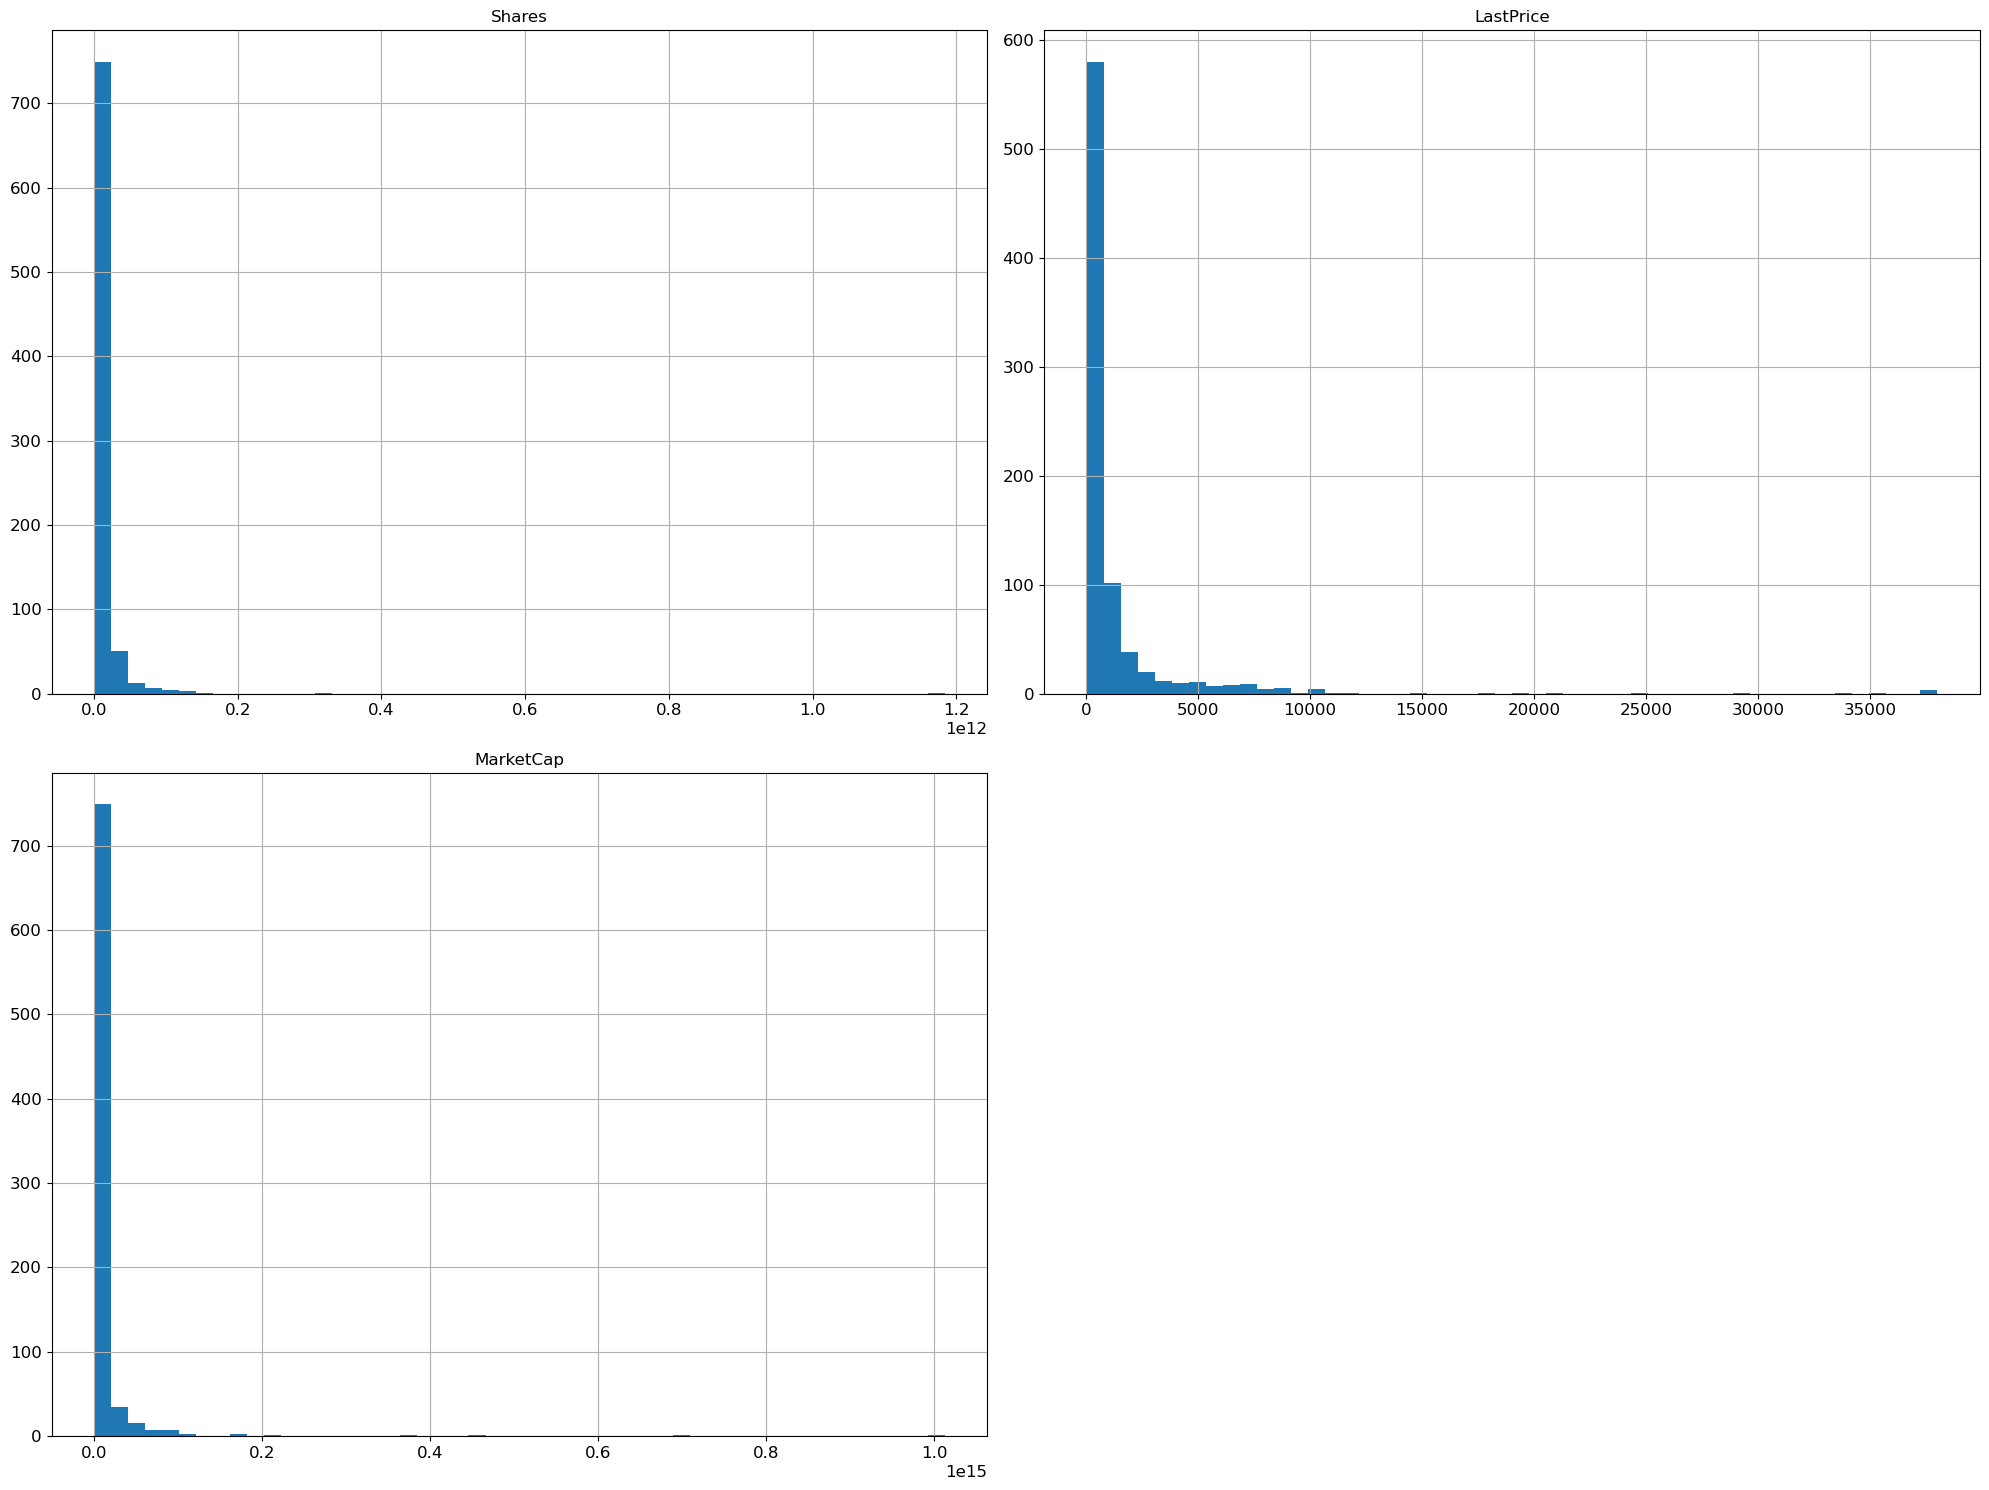

In [8]:
# Visualisasi distribusi data numerik
%matplotlib inline
import matplotlib.pyplot as plt
stock.hist(bins=50, figsize=(20,15))
save_fig("stock_histogram_plots")
plt.show()

## Create a Test Set

Memisahkan data menjadi set training dan testing guna mencegah data leakage dan mengurangi bias dalam evaluasi model. Langkah pertama adalah melakukan pembersihan awal dengan menghapus baris yang tidak memiliki label target (MarketCap) sebelum pembagian data. Selanjutnya, digunakan StratifiedShuffleSplit berdasarkan kolom Sector, sehingga proporsi sektor industri pada data training dan testing tetap seimbang dan representatif terhadap populasi asli. Hasil pembagian ini menghasilkan 659 data untuk training dan 165 data untuk testing.

In [9]:
# Set random seed untuk reproducibility
np.random.seed(42)

In [13]:
from sklearn.model_selection import train_test_split

# Hapus baris dengan MarketCap null (target variable)
stock_clean = stock.dropna(subset=['MarketCap']).reset_index(drop=True)

train_set, test_set = train_test_split(stock_clean, test_size=0.2, random_state=42)

In [14]:
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Training set size: 659
Test set size: 165


In [15]:
# Stratified sampling berdasarkan Sector
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(stock_clean, stock_clean["Sector"]):
    strat_train_set = stock_clean.loc[train_index]
    strat_test_set = stock_clean.loc[test_index]

In [16]:
# Check proporsi sektor di test set
strat_test_set["Sector"].value_counts() / len(strat_test_set)

Sector
Consumer Cyclicals           0.169697
Consumer Non-Cyclicals       0.139394
Financials                   0.127273
Basic Materials              0.115152
Properties & Real Estate     0.103030
Energy                       0.090909
Infrastructures              0.072727
Industrials                  0.066667
Technology                   0.042424
Transportation & Logistic    0.036364
Healthcare                   0.036364
Name: count, dtype: float64

# Discover and Visualize the Data to Gain Insights

Melakukan eksplorasi data secara mendalam hanya pada data latih, agar analisis tidak terpengaruh atau bias oleh data uji. Untuk itu, data latih disalin ke dalam variabel stock_data, sehingga manipulasi dan eksperimen dapat dilakukan tanpa merusak atau mengubah set data asli.

In [17]:
stock_data = strat_train_set.copy()

## Visualizing Data

Melihat pola hubungan antar variabel secara visual. Dilakukan dengan membuat scatter plot yang menampilkan LastPrice pada sumbu x dan MarketCap pada sumbu y. Ukuran lingkaran pada plot merepresentasikan jumlah lembar saham (Shares), sedangkan warnanya mencerminkan harga saham (LastPrice). Visualisasi ini membantu memahami bagaimana harga dan volume saham berkontribusi terhadap kapitalisasi pasar.

Saving figure stock_prices_scatterplot


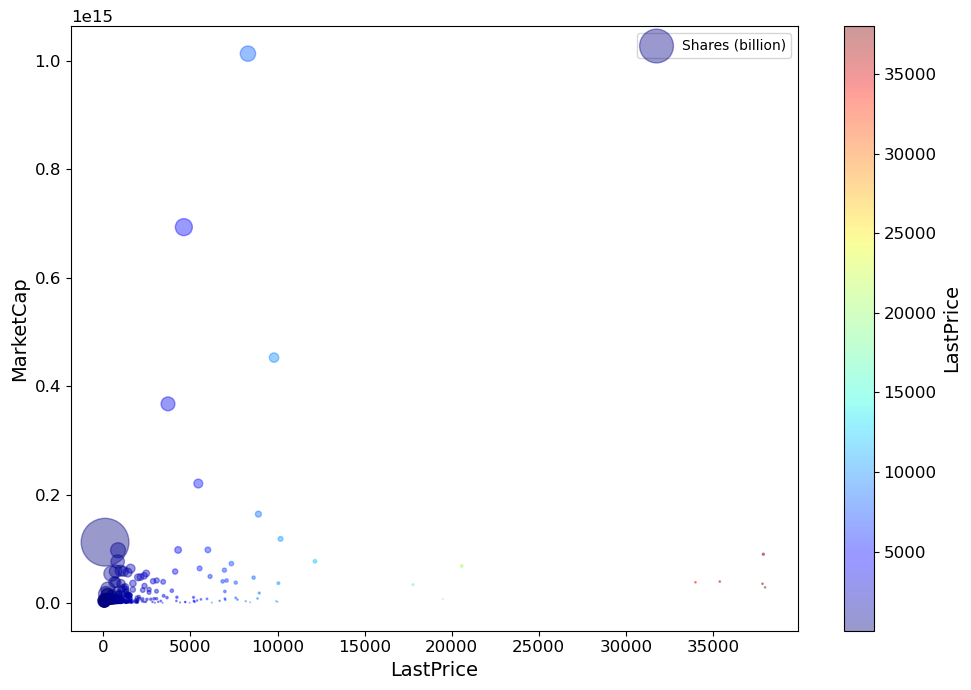

In [18]:
# Scatter plot: LastPrice vs MarketCap
stock_data.plot(kind="scatter", x="LastPrice", y="MarketCap", alpha=0.4,
             s=stock_data["Shares"]/1e9, label="Shares (billion)", figsize=(10,7),
             c="LastPrice", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
save_fig("stock_prices_scatterplot")
plt.show()

## Looking for Correlations

Mengukur hubungan linear antar variabel numerik dengan target MarketCap. Dilakukan perhitungan koefisien korelasi Pearson, yang menunjukkan kekuatan dan arah hubungan antar variabel. Hasil analisis menunjukkan adanya korelasi positif yang kuat antara Shares dan LastPrice terhadap MarketCap, artinya kenaikan jumlah saham atau harga saham cenderung diikuti oleh peningkatan kapitalisasi pasar.

In [21]:
# Pilih hanya kolom numerik untuk correlation
corr_matrix = stock_data.select_dtypes(include=[np.number]).corr()

In [22]:
corr_matrix["MarketCap"].sort_values(ascending=False)

MarketCap    1.000000
Shares       0.249754
LastPrice    0.235159
Name: MarketCap, dtype: float64

Saving figure scatter_matrix_plot


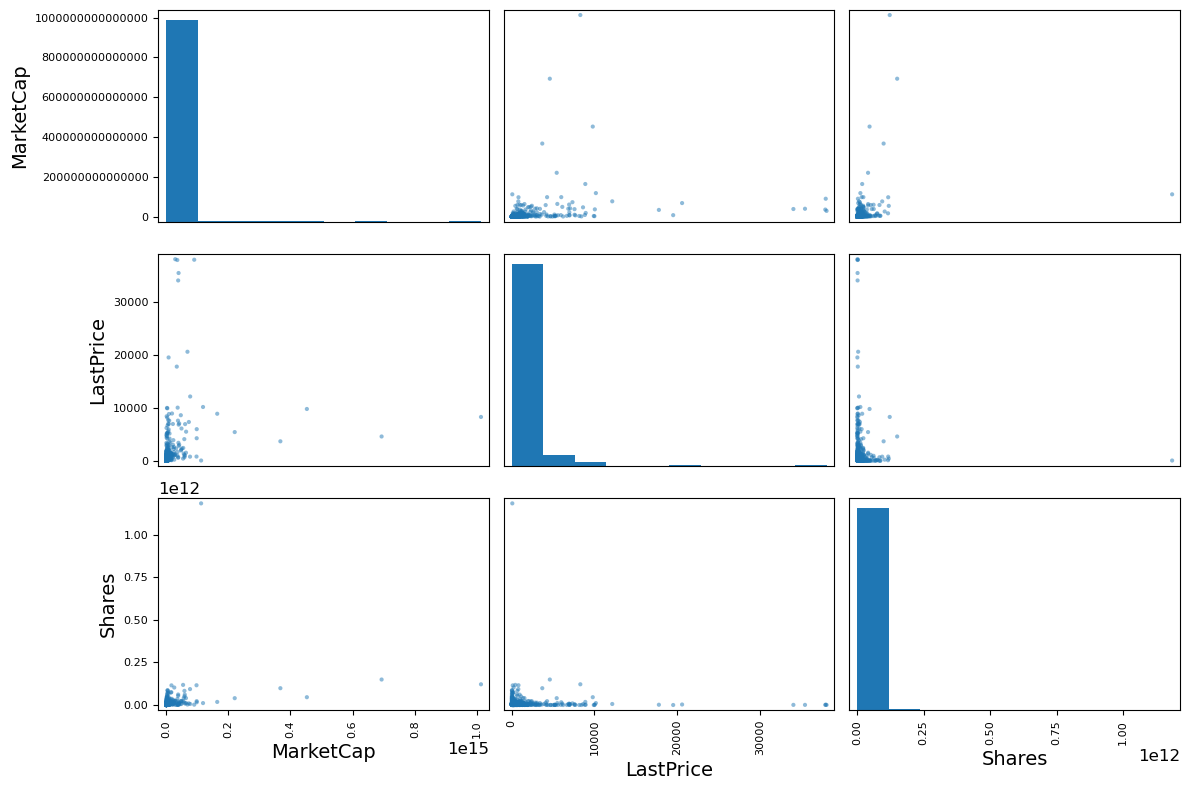

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["MarketCap", "LastPrice", "Shares"]
scatter_matrix(stock_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")
plt.show()

Saving figure price_vs_marketcap_scatterplot


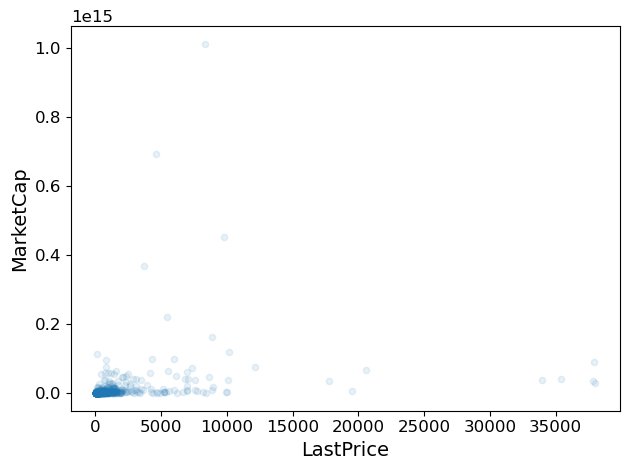

In [24]:
stock_data.plot(kind="scatter", x="LastPrice", y="MarketCap", alpha=0.1)
save_fig("price_vs_marketcap_scatterplot")
plt.show()

## Experimenting with Attribute Combinations

Melakukan feature engineering, yaitu membuat fitur baru yang berpotensi lebih prediktif terhadap MarketCap. Dua fitur baru dibuat: value_per_share, yaitu rasio antara MarketCap dan Shares, serta years_listed, yang menghitung lama perusahaan terdaftar di bursa (tahun 2023 dikurangi tahun listing). Setelah fitur dibuat, dilakukan pengecekan kembali korelasi fitur-fitur baru ini dengan MarketCap untuk menilai seberapa relevan mereka dalam memprediksi target.

In [26]:
# Buat fitur baru: value per share
stock_data["value_per_share"] = stock_data["MarketCap"] / stock_data["Shares"]

# Convert ListingDate to datetime dan extract tahun
stock_data["ListingYear"] = pd.to_datetime(stock_data["ListingDate"], format='mixed', errors='coerce').dt.year
stock_data["years_listed"] = 2023 - stock_data["ListingYear"]

In [27]:
corr_matrix = stock_data.select_dtypes(include=[np.number]).corr()
corr_matrix["MarketCap"].sort_values(ascending=False)

MarketCap          1.000000
Shares             0.249754
LastPrice          0.235159
value_per_share    0.235159
years_listed       0.084201
ListingYear       -0.084201
Name: MarketCap, dtype: float64

# Prepare the Data for Machine Learning Algorithms

Menyiapkan data agar siap digunakan oleh algoritma Machine Learning. Prosesnya meliputi pemisahan antara predictors (fitur input) dan labels (target MarketCap), sehingga model dapat belajar dari fitur untuk memprediksi nilai target dengan benar.

In [28]:
# Pisahkan features dan target
stock_prepared = strat_train_set.drop("MarketCap", axis=1)
stock_labels = strat_train_set["MarketCap"].copy()

## Data Cleaning

Menangani data yang hilang agar model Machine Learning dapat memproses dataset dengan lengkap. Caranya adalah menggunakan SimpleImputer dengan strategi median untuk mengisi nilai kosong pada kolom numerik. Pendekatan ini membantu menjaga distribusi data dan mencegah error saat pelatihan model.

In [29]:
# Check missing values
stock_prepared.isnull().sum()

Code                   0
Name                   0
ListingDate            0
Shares                 0
ListingBoard           0
Sector                 0
LastPrice              0
MinutesFirstAdded     30
MinutesLastUpdated    30
HourlyFirstAdded      13
HourlyLastUpdated     13
DailyFirstAdded        0
DailyLastUpdated       0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

# Pilih hanya kolom numerik
stock_num = stock_prepared.select_dtypes(include=[np.number])

imputer = SimpleImputer(strategy="median")
imputer.fit(stock_num)

X = imputer.transform(stock_num)
stock_tr = pd.DataFrame(X, columns=stock_num.columns, index=stock_num.index)

## Handling Text and Categorical Attributes

Mengubah data teks menjadi format numerik agar dapat digunakan oleh algoritma Machine Learning. Caranya adalah dengan menggunakan OneHotEncoder untuk mengubah kolom kategorikal, seperti Sector dan ListingBoard, menjadi matriks biner (0 dan 1), sehingga setiap kategori direpresentasikan secara numerik dan model dapat memprosesnya dengan benar.

In [31]:
stock_cat = stock_prepared[["Sector", "ListingBoard"]]
stock_cat.head(10)

,Sector,ListingBoard
128,Healthcare,Utama
168,Financials,Utama
105,Properties & Real Estate,Utama
401,Healthcare,Utama
387,Consumer Non-Cyclicals,Utama
125,Consumer Cyclicals,Pengembangan
367,Energy,Pengembangan
24,Basic Materials,Pengembangan
619,Infrastructures,Pengembangan
169,Consumer Non-Cyclicals,Utama


In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown='ignore')
stock_cat_1hot = cat_encoder.fit_transform(stock_cat)
stock_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1318 stored elements and shape (659, 14)>

In [33]:
cat_encoder.categories_

[array(['Basic Materials', 'Consumer Cyclicals', 'Consumer Non-Cyclicals',
        'Energy', 'Financials', 'Healthcare', 'Industrials',
        'Infrastructures', 'Properties & Real Estate', 'Technology',
        'Transportation & Logistic'], dtype=object),
 array(['Akselerasi', 'Pengembangan', 'Utama'], dtype=object)]

## Transformation Pipelines

Menyatukan semua langkah pemrosesan data menjadi satu alur yang rapi dan dapat digunakan ulang. Pertama, dibuat Pipeline untuk data numerik yang terdiri dari Imputer (untuk mengisi nilai kosong) diikuti StandardScaler (untuk menormalkan skala data). Selanjutnya, pipeline numerik digabungkan dengan pemrosesan data kategorikal menggunakan ColumnTransformer. Hasil akhir dari proses ini adalah dataset siap latih bernama stock_prepared_final, yang telah melalui semua tahap pembersihan, transformasi, dan normalisasi.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

stock_num_tr = num_pipeline.fit_transform(stock_num)

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = list(stock_num)
cat_attribs = ["Sector", "ListingBoard"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

stock_prepared_final = full_pipeline.fit_transform(stock_prepared)

In [36]:
stock_prepared_final.shape

(659, 16)

# Select and Train a Model

## Training and Evaluating on the Training Set

Melatih model dasar dan menilai kinerjanya. Linear Regression dilatih terlebih dahulu, namun menghasilkan RMSE yang sangat tinggi, menandakan model underfitting atau data memiliki varians yang sangat besar sehingga model sederhana tidak mampu menangkap pola. Selanjutnya, Decision Tree dilatih dan menghasilkan RMSE = 0, yang merupakan indikasi kuat overfitting, karena model terlalu “menghafal” data latih dan kemungkinan besar tidak akan bekerja baik pada data baru.

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(stock_prepared_final, stock_labels)

LinearRegression()

In [38]:
# Test pada beberapa data
some_data = stock_prepared.iloc[:5]
some_labels = stock_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [6.78640428e+12 3.57843009e+13 4.67692926e+12 8.22069468e+12
 6.75045377e+12]
Labels: [3613434793920.0, 1121284214136.0, 1234855827200.0, 6053860000000.0, 483159744000.0]


In [39]:
from sklearn.metrics import mean_squared_error

stock_predictions = lin_reg.predict(stock_prepared_final)
lin_mse = mean_squared_error(stock_labels, stock_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression RMSE: {lin_rmse:,.0f}")

Linear Regression RMSE: 50,749,558,412,857


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(stock_prepared_final, stock_labels)

DecisionTreeRegressor(random_state=42)

In [41]:
stock_predictions = tree_reg.predict(stock_prepared_final)
tree_mse = mean_squared_error(stock_labels, stock_predictions)
tree_rmse = np.sqrt(tree_mse)
print(f"Decision Tree RMSE: {tree_rmse:,.0f}")

Decision Tree RMSE: 0


## Better Evaluation Using Cross-Validation

Melakukan evaluasi model yang lebih valid dan mengurangi risiko overfitting. K-Fold Cross-Validation digunakan untuk memvalidasi kinerja Decision Tree dan Linear Regression secara lebih andal dengan membagi data latih menjadi beberapa fold. Selain itu, dicoba juga model RandomForestRegressor, yaitu model ensemble yang menggabungkan banyak pohon keputusan. Hasil validasi menunjukkan bahwa Random Forest memberikan kinerja yang lebih baik dan lebih stabil dibandingkan Decision Tree tunggal, karena mampu menangkap pola data tanpa terlalu menghafal data latih.

In [42]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores = cross_val_score(tree_reg, stock_prepared_final, stock_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [9.13174817e+12 7.16176223e+13 8.97021242e+12 6.95902314e+13
 5.84097462e+12 3.95846669e+13 2.26855490e+13 8.62280431e+12
 1.07478874e+13 3.36288731e+13]
Mean: 28042056956886.387
Standard deviation: 23892752030727.223


In [43]:
lin_scores = cross_val_score(lin_reg, stock_prepared_final, stock_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.52443976e+13 2.24956919e+14 1.87432420e+13 1.16615346e+14
 1.72587441e+13 7.71543639e+13 2.60023763e+13 2.40719821e+13
 4.84649250e+13 4.42682404e+13]
Mean: 61278053724156.35
Standard deviation: 62492580981122.78


In [44]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(stock_prepared_final, stock_labels)

RandomForestRegressor(random_state=42)

In [45]:
forest_scores = cross_val_score(forest_reg, stock_prepared_final, stock_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [8.53287428e+12 7.18272243e+13 1.45790776e+13 8.48670861e+13
 7.29192072e+12 1.12796266e+13 1.04827087e+13 1.30263156e+13
 3.48525664e+13 3.45055448e+13]
Mean: 29124494517646.645
Standard deviation: 26513917599651.137


# Fine-Tune Your Model

## Grid Search

Menemukan kombinasi hyperparameter terbaik bagi model Random Forest agar kinerjanya optimal. Proses dilakukan dengan GridSearchCV, yang mencoba berbagai kombinasi parameter, khususnya n_estimators (jumlah pohon) dan max_features (jumlah fitur maksimum yang dipertimbangkan pada setiap split). Hasil pencarian menunjukkan kombinasi terbaik pada parameter {'max_features': 6, 'n_estimators': 10}, yang memberikan performa model paling optimal berdasarkan kriteria evaluasi.

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(stock_prepared_final, stock_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42530991248594.14 {'max_features': 2, 'n_estimators': 3}
35769324563347.0 {'max_features': 2, 'n_estimators': 10}
37158540325200.89 {'max_features': 2, 'n_estimators': 30}
41270573963533.16 {'max_features': 4, 'n_estimators': 3}
35219524957260.91 {'max_features': 4, 'n_estimators': 10}
34477690190600.703 {'max_features': 4, 'n_estimators': 30}
31704823343784.113 {'max_features': 6, 'n_estimators': 3}
30566459203277.965 {'max_features': 6, 'n_estimators': 10}
32501019198586.11 {'max_features': 6, 'n_estimators': 30}
38569032990405.52 {'max_features': 8, 'n_estimators': 3}
35086851542861.98 {'max_features': 8, 'n_estimators': 10}
35405393047782.97 {'max_features': 8, 'n_estimators': 30}
40142791183056.945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
34629946356753.004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
44670010330282.23 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
31870976105803.023 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Analyze the Best Models and Their Errors

Menginterpretasi model dan memahami kontribusi masing-masing fitur terhadap prediksi (Explainability). Dilakukan dengan melihat Feature Importance, yang menunjukkan seberapa besar pengaruh setiap fitur terhadap output model. Hasil analisis memperlihatkan bahwa Shares (Jumlah Saham) dan LastPrice (Harga Terakhir) merupakan faktor paling dominan dalam memprediksi MarketCap, sehingga keduanya menjadi variabel kunci yang menentukan nilai kapitalisasi pasar.

In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.59245711e-01, 3.50930604e-01, 2.00498682e-03, 6.59449155e-04,
       1.02118673e-03, 6.62477862e-04, 4.81293968e-02, 3.14622246e-04,
       1.74464649e-04, 4.00459397e-03, 3.40876215e-03, 6.00843356e-03,
       8.34522636e-06, 9.42622355e-06, 1.12005644e-02, 1.22169748e-02])

In [50]:
# Get feature names
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) + list(cat_encoder.categories_[1])
attributes = num_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)[:10]

[(np.float64(0.5592457114223307), 'Shares'),
 (np.float64(0.35093060388434516), 'LastPrice'),
 (np.float64(0.04812939684468306), 'Financials'),
 (np.float64(0.012216974809169105), 'Utama'),
 (np.float64(0.011200564445234755), 'Pengembangan'),
 (np.float64(0.006008433563079624), 'Technology'),
 (np.float64(0.004004593969138324), 'Infrastructures'),
 (np.float64(0.0034087621510575246), 'Properties & Real Estate'),
 (np.float64(0.0020049868165085286), 'Basic Materials'),
 (np.float64(0.001021186733059577), 'Consumer Non-Cyclicals')]

## Evaluate Your System on the Test Set

Bagian ini bertujuan untuk melakukan pengujian akhir (final evaluation) pada data yang belum pernah dilihat oleh model. Proses dilakukan dengan menggunakan model terbaik hasil Grid Search untuk memprediksi Test Set. Selanjutnya, dihitung Final RMSE sebagai ukuran kesalahan prediksi, serta 95% Confidence Interval untuk mengetahui rentang kesalahan prediksi, sehingga dapat menilai seberapa akurat dan andal model dalam memprediksi data baru.

In [51]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MarketCap", axis=1)
y_test = strat_test_set["MarketCap"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE on Test Set: {final_rmse:,.0f}")

Final RMSE on Test Set: 22,282,206,374,674


In [52]:
# Confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: [           nan 3.20275512e+13]


## Model Persistence

Menyimpan model dan alur pemrosesan data agar dapat digunakan kembali di aplikasi lain tanpa harus melatih ulang. Caranya adalah menggunakan joblib untuk menyimpan model ke file stock_market_model.pkl dan pipeline pemrosesan data ke file stock_pipeline.pkl, sehingga model dan pipeline bisa di-load kapan saja untuk prediksi baru.

In [53]:
import joblib

# Save model
joblib.dump(final_model, "stock_market_model.pkl")

# Save pipeline
joblib.dump(full_pipeline, "stock_pipeline.pkl")

print("Model saved successfully!")

Model saved successfully!


In [54]:
# Load model
loaded_model = joblib.load("stock_market_model.pkl")
loaded_pipeline = joblib.load("stock_pipeline.pkl")

# Test loaded model
some_data = X_test.iloc[:5]
some_data_prepared = loaded_pipeline.transform(some_data)
predictions = loaded_model.predict(some_data_prepared)

print("Predictions:", predictions)
print("Actual:", list(y_test.iloc[:5]))

Predictions: [5.62361885e+13 8.27890113e+11 1.94157016e+11 3.15545202e+12
 1.18812341e+13]
Actual: [3153794968598.0, 830352053238.0, 178358705477.0, 2199787500000.0, 15397506664000.0]
